Carregar o dataset: Dataset_de_Transporte.csv

In [16]:
import pandas as pd
dados = pd.read_csv("../data/DataSetSala.csv", sep = ",")

In [4]:
dados

,Carimbo de data/hora,Cidade,Meio de Transporte,Idade
0,2025/03/27 10:19:29 PM GMT-3,São Paulo,Ônibus,23
1,2025/03/27 10:19:39 PM GMT-3,Santo André,Moto,46
2,2025/03/27 10:19:40 PM GMT-3,Santo André,Combinado (mais de um),18
3,2025/03/27 10:19:43 PM GMT-3,São Caetano do Sul,Carro,18
4,2025/03/27 10:19:47 PM GMT-3,Santo André,Carro,44
5,2025/03/27 10:19:54 PM GMT-3,Santo André,Carro,18
6,2025/03/27 10:20:02 PM GMT-3,Santo André,Carro,17
7,2025/03/27 10:20:07 PM GMT-3,São Paulo,Carro,24
8,2025/03/27 10:20:11 PM GMT-3,Santo André,Carro,18
9,2025/03/27 10:20:15 PM GMT-3,Santo André,Combinado (mais de um),22


Qual a média de idade das pessoas em cada cidade?

In [5]:
mediaIdadeCidade = dados.groupby("Cidade")["Idade"].mean()
mediaIdadeCidade

Cidade
Rio Grande da Serra      28.000000
Santo André              25.000000
São Bernardo do Campo    19.000000
São Caetano do Sul       18.000000
São Paulo                21.333333
Name: Idade, dtype: float64

Qual o meio de transporte mais utilizado em cada cidade?

In [6]:
transportMaisUtilizado = dados.groupby('Cidade')['Meio de Transporte'].agg(lambda x: x.value_counts().index[0])
transportMaisUtilizado

Cidade
Rio Grande da Serra      Ônibus
Santo André               Carro
São Bernardo do Campo     Carro
São Caetano do Sul        Carro
São Paulo                Ônibus
Name: Meio de Transporte, dtype: object

Existe alguma correlação entre idade e meio de transporte utilizado?

In [7]:
correlacaoTransporteIdade = dados.groupby('Meio de Transporte')['Idade'].mean()
correlacaoTransporteIdade

Meio de Transporte
A pé                      18.000000
Carro                     20.727273
Combinado (mais de um)    20.000000
Moto                      46.000000
Ônibus                    22.500000
Name: Idade, dtype: float64

Qual a distribuição etária das pessoas em cada meio de transporte?

In [8]:
distribuicaoTransporte = dados.groupby('Meio de Transporte')['Idade'].describe()
distribuicaoTransporte

,count,mean,std,min,25%,50%,75%,max
Meio de Transporte,,,,,,,,
A pé,1.0,18.000000,NaN,18.0,18.0,18.0,18.00,18.0
Carro,11.0,20.727273,7.988628,17.0,17.0,18.0,19.00,44.0
Combinado (mais de um),2.0,20.000000,2.828427,18.0,19.0,20.0,21.00,22.0
Moto,1.0,46.000000,NaN,46.0,46.0,46.0,46.00,46.0
Ônibus,6.0,22.500000,4.593474,18.0,19.0,21.0,26.75,28.0


Qual cidade apresenta a maior diversidade de meios de transporte utilizados?Gráficos:

In [9]:
diversidadeTransporteCidade = dados.groupby('Cidade')['Meio de Transporte'].nunique()
diversidadeTransporteCidade

Cidade
Rio Grande da Serra      1
Santo André              3
São Bernardo do Campo    2
São Caetano do Sul       3
São Paulo                2
Name: Meio de Transporte, dtype: int64

In [10]:
dados["Meio de Transporte"].unique()

array(['Ônibus', 'Moto', 'Combinado (mais de um)', 'Carro', 'A pé'],
      dtype=object)

GRÁFICOS

Qual a distribuição etária das pessoas que usam cada meio de transporte?

In [11]:
import matplotlib.pyplot as plt

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for transporte in dados['Meio de Transporte'].unique(): 
    plt.hist(dados[dados['Meio de Transporte'] == transporte]['Idade'], 
             alpha=0.6, 
             bins=10,
             label=transporte)  
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas') 
plt.title('Distribuição Etária por Meio de Transporte')
plt.legend()
plt.show()  

TypeError: string indices must be integers, not 'str'

<Figure size 1000x500 with 0 Axes>

 Como varia a média de idade entre as cidades?

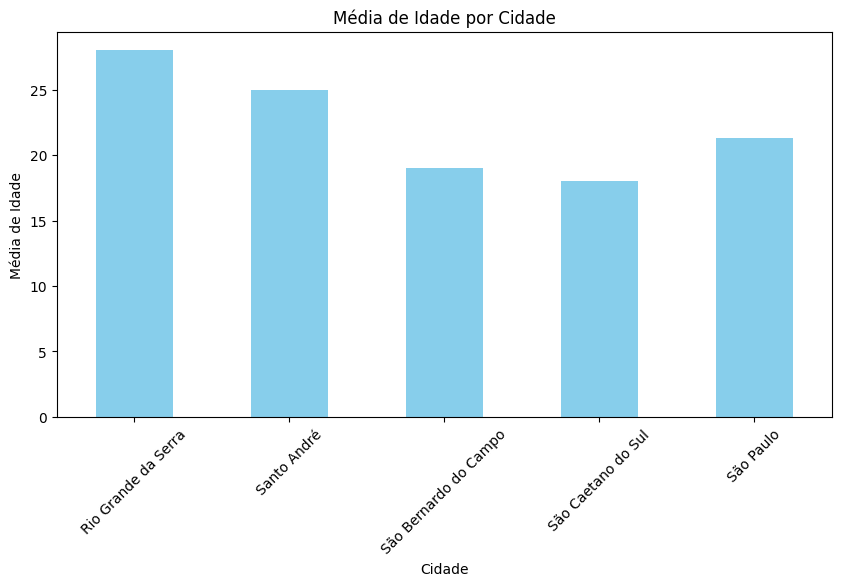

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
mediaIdadeCidade.plot(kind = "bar", x = "Cidade", y = "Média de Idade", legend = False, color = "skyblue")
plt.ylabel("Média de Idade")
plt.title("Média de Idade por Cidade")
plt.xticks(rotation = 45)
plt.show()

Qual meio de transporte é mais popular em cada cidade?

In [18]:
# Qual meio de transporte é mais popular em cada cidade?
transporteMaisUtilizado = dados.groupby('Cidade')['Meio de Transporte'].agg(lambda x: x.value_counts().index[0])
transporteMaisUtilizado


Cidade
Rio Grande da Serra      Ônibus
Santo André               Carro
São Bernardo do Campo     Carro
São Caetano do Sul        Carro
São Paulo                Ônibus
Name: Meio de Transporte, dtype: object

 Quantos meios de transporte diferentes são usados em cada cidade?


In [19]:
# Quantos meios de transporte diferentes são usados em cada cidade?
meios_transporte_cidade = dados.groupby('Cidade')['Meio de Transporte'].nunique()
meios_transporte_cidade


Cidade
Rio Grande da Serra      1
Santo André              3
São Bernardo do Campo    2
São Caetano do Sul       3
São Paulo                2
Name: Meio de Transporte, dtype: int64

Existe variação significativa de idade entre os diferentes meios de transporte?

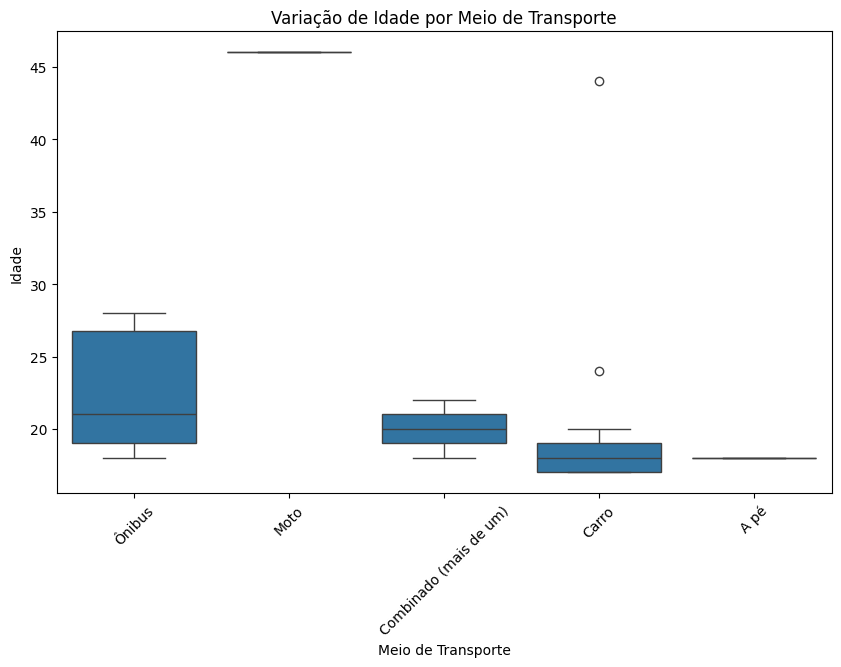

In [20]:
# prompt: Existe variação significativa de idade entre os diferentes meios de transporte?

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Meio de Transporte', y='Idade', data=dados)
plt.title('Variação de Idade por Meio de Transporte')
plt.xlabel('Meio de Transporte')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.show()
